In [2]:
from tqdm import tqdm
import gymnasium as gym
from src.Sarsa import SarsaAgent
from src.SarsaLambda import SarsaLambdaAgent
from src.QLearning import QLearningAgent
from src.QLearningLambda import QLearningLambdaAgent
from src.Helpers import store_data, load_data, blackjack_create_grids, blackjack_create_plots, training_visualize

In [3]:
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay: float = start_epsilon / (n_episodes / 2)
final_epsilon = 0.0
lambda_factor = 0.5

params = {
    'learning_rate': learning_rate,
    'n_episodes': n_episodes,
    'start_epsilon': start_epsilon,
    'epsilon_decay': epsilon_decay,
    'final_epsilon': final_epsilon,
    'lambda_factor': lambda_factor
}

In [4]:
env: gym.Env = gym.make('Blackjack-v1', render_mode="rgb_array", natural=False, sab=False)
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)

agent_ql = QLearningAgent(
    action_space=env.action_space,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)
agent_sarsa = SarsaAgent(
    action_space=env.action_space,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)
agent_ql_lambda = QLearningLambdaAgent(
    action_space=env.action_space,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    lambda_factor=lambda_factor,
)
agent_sarsa_lambda = SarsaLambdaAgent(
    action_space=env.action_space,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    lambda_factor=lambda_factor,
)

In [4]:
for episode in tqdm(range(n_episodes)):
    curr_observation, info = env.reset()
    curr_action: int = agent_ql.get_action(curr_observation)
    # play one episode
    while True:
        # act upon the enviromment
        next_observation, reward, terminated, truncated, info = env.step(curr_action)
        is_terminal: bool = terminated or truncated
        # select next action
        next_action: int = agent_ql.get_action(next_observation)
        # update the agent
        agent_ql.update(curr_observation, curr_action, reward, terminated, next_observation, next_action)
        # update the current observation and action
        curr_observation = next_observation
        curr_action = next_action
        # end the episode
        if (is_terminal):
            break
    # reduce exploration factor
    agent_ql.decay_epsilon()

100%|██████████| 100000/100000 [00:58<00:00, 1719.65it/s]


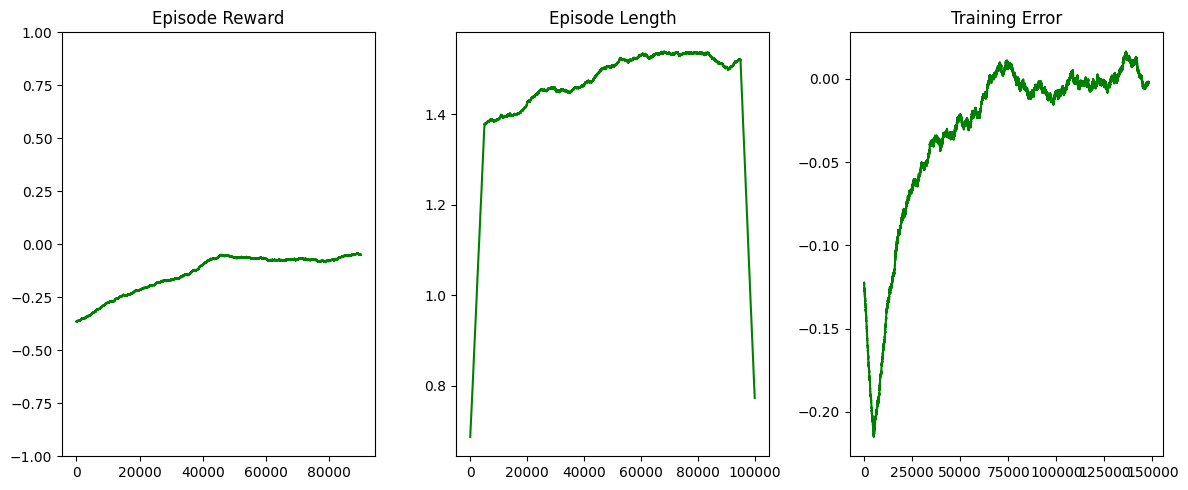

In [5]:
store_data('blackjack_qlearning_1', agent_ql, env, params)
training_visualize(env, agent_ql, 'green', 10_000)

In [ ]:
for episode in tqdm(range(n_episodes)):
    curr_observation, info = env.reset()
    curr_action: int = agent_sarsa.get_action(curr_observation)
    # play one episode
    while True:
        # act upon the enviromment
        next_observation, reward, terminated, truncated, info = env.step(curr_action)
        is_terminal: bool = terminated or truncated
        # select next action
        next_action: int = agent_sarsa.get_action(next_observation)
        # update the agent
        agent_sarsa.update(curr_observation, curr_action, reward, terminated, next_observation, next_action)
        # update the current observation and action
        curr_observation = next_observation
        curr_action = next_action
        # end the episode
        if (is_terminal):
            break
    # reduce exploration factor
    agent_sarsa.decay_epsilon()

In [ ]:
training_visualize(env, agent_sarsa, 'yellow',10_000)

In [ ]:
for episode in tqdm(range(n_episodes)):
    curr_observation, info = env.reset()
    curr_action: int = agent_ql_lambda.get_action(curr_observation)
    # play one episode
    while True:
        # act upon the enviromment
        next_observation, reward, terminated, truncated, info = env.step(curr_action)
        is_terminal: bool = terminated or truncated
        # select next action
        next_action: int = agent_ql_lambda.get_action(next_observation)
        # update the agent
        agent_ql_lambda.update(curr_observation, curr_action, reward, terminated, next_observation, next_action)
        # update the current observation and action
        curr_observation = next_observation
        curr_action = next_action
        # end the episode
        if (is_terminal):
            break
    # reduce exploration factor
    agent_ql_lambda.decay_epsilon()

In [ ]:
training_visualize(env, agent_ql_lambda, 'green', 10_000)

In [ ]:
for episode in tqdm(range(n_episodes)):
    curr_observation, info = env.reset()
    curr_action: int = agent_sarsa_lambda.get_action(curr_observation)
    # play one episode
    while True:
        # act upon the enviromment
        next_observation, reward, terminated, truncated, info = env.step(curr_action)
        is_terminal: bool = terminated or truncated
        # select next action
        next_action: int = agent_sarsa_lambda.get_action(next_observation)
        # update the agent
        agent_sarsa_lambda.update(curr_observation, curr_action, reward, terminated, next_observation, next_action)
        # update the current observation and action
        curr_observation = next_observation
        curr_action = next_action
        # end the episode
        if (is_terminal):
            break
    # reduce exploration factor
    agent_sarsa_lambda.decay_epsilon()

In [ ]:
training_visualize(env, agent_sarsa_lambda, 'yellow', 10_000)

In [ ]:
agent = agent_ql

# Visualizing state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = blackjack_create_grids(agent, usable_ace=True)
blackjack_create_plots(value_grid, policy_grid, title="With usable ace")


In [ ]:
# Visualizing state values & policy without usable ace (ace counts as 1)
value_grid, policy_grid = blackjack_create_grids(agent, usable_ace=False)
blackjack_create_plots(value_grid, policy_grid, title="Without usable ace")

In [ ]:
actions: list[str] = ["stick", "hit"]

agent = agent_sarsa
curr_obs, info = env.reset()
# play one episode
while True:
    next_action: int = agent.get_action(curr_obs)
    next_obs, reward, terminated, truncated, info = env.step(next_action)
    print ("Current observation:", curr_obs)
    print ("Player's cards:", env.player)
    print ("Dealer's card:", env.dealer[0])
    print ("Action taken:", actions[next_action])
    print ("-"*20)
    curr_obs = next_obs
    if (terminated or truncated):
        print ("Final observation:", curr_obs)
        print ("Player's cards:", env.player)
        print ("Dealer's cards:", env.dealer)
        print ("Reward received:", reward)
        break
    